## Loading libraries

In [1]:
import numpy as np
import pandas as pd

### Importing datset

In [2]:
crop1 = pd.read_csv('../Datasets/Crop_recommendation.csv')
crop2 = pd.read_csv('../Datasets/Crop and fertilizer dataset.csv')

In [3]:
crop1.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
crop2.head()

District_Name Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  \
0      Kolhapur      Black        75          50        100  6.5      1000   
1      Kolhapur      Black        80          50        100  6.5      1000   
2      Kolhapur      Black        85          50        100  6.5      1000   
3      Kolhapur      Black        90          50        100  6.5      1000   
4      Kolhapur      Black        95          50        100  6.5      1000   

   Temperature       Crop Fertilizer                          Link  
0           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
1           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
2           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
3           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo  
4           20  Sugarcane       Urea  https://youtu.be/2t5Am0xLTOo

In [5]:
# For crop2, drop the columns that are not needed:
# 'District_Name', 'Soil_color', 'Fertilizer', and 'Link' are not required.
crop2 = crop2.drop(columns=['District_Name', 'Soil_color', 'Fertilizer', 'Link'])

In [6]:
crop2.head()

Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature       Crop
0        75          50        100  6.5      1000           20  Sugarcane
1        80          50        100  6.5      1000           20  Sugarcane
2        85          50        100  6.5      1000           20  Sugarcane
3        90          50        100  6.5      1000           20  Sugarcane
4        95          50        100  6.5      1000           20  Sugarcane

#### Rename the remaining columns in crop2 to match crop1:
 1. crop1 columns: N, P, K, temperature, humidity, ph, rainfall, label
 2. crop2 columns after dropping: Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Crop

In [7]:
crop2 = crop2.rename(columns={
    'Nitrogen': 'N',
    'Phosphorus': 'P',
    'Potassium': 'K',
    'Temperature': 'temperature',
    'pH': 'ph',
    'Rainfall': 'rainfall',
    'Crop': 'label'
})

In [8]:
def fill_humidity_with_random(source_df, target_df, column='humidity'):
    # Calculate the lower (25th percentile) and upper (75th percentile) quartiles from the source
    lower_quartile = source_df[column].quantile(0.25)
    upper_quartile = source_df[column].quantile(0.75)
    
    # Debug: print quartile values
    print(f"Lower quartile (25th percentile): {lower_quartile}")
    print(f"Upper quartile (75th percentile): {upper_quartile}")
    
    # Number of rows to fill in the target DataFrame
    n_rows = target_df.shape[0]
    
    # Generate random values for each row within the [Q1, Q3] interval
    random_values = np.random.uniform(lower_quartile, upper_quartile, size=n_rows)
    
    # Assign these random values to the target DataFrame's 'humidity' column
    target_df[column] = random_values
    
    return target_df

def standardize_rainfall(source_df, target_df, column='rainfall'):
    # Number of rows in target_df
    n_rows = target_df.shape[0]
    
    # Sample randomly from the source rainfall values
    standardized_values = np.random.choice(source_df[column].values, size=n_rows, replace=True)
    
    # Assign these values to the target dataframe
    target_df[column] = standardized_values
    
    return target_df


In [9]:
# Fill the missing 'humidity' column in crop2 using the custom function
crop2 = fill_humidity_with_random(crop1, crop2, column='humidity')

Lower quartile (25th percentile): 60.2619528025
Upper quartile (75th percentile): 89.948770755


In [10]:
crop2.head()

N   P    K   ph  rainfall  temperature      label   humidity
0  75  50  100  6.5      1000           20  Sugarcane  80.197632
1  80  50  100  6.5      1000           20  Sugarcane  68.605301
2  85  50  100  6.5      1000           20  Sugarcane  75.837479
3  90  50  100  6.5      1000           20  Sugarcane  84.714483
4  95  50  100  6.5      1000           20  Sugarcane  86.625989

In [11]:
# Reorder crop2 columns to match crop1's order
crop2 = crop2[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [12]:
# Standardize the rainfall column in crop2 using the rainfall distribution in crop1
crop2 = standardize_rainfall(crop1, crop2, column='rainfall')

In [13]:
crop2.head()

N   P    K  temperature   humidity   ph   rainfall      label
0  75  50  100           20  80.197632  6.5  53.146262  Sugarcane
1  80  50  100           20  68.605301  6.5  45.044671  Sugarcane
2  85  50  100           20  75.837479  6.5  66.356341  Sugarcane
3  90  50  100           20  84.714483  6.5  64.777914  Sugarcane
4  95  50  100           20  86.625989  6.5  22.218071  Sugarcane

In [14]:
crop1.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [15]:
# Merge the two datasets
merged_df = pd.concat([crop1, crop2], ignore_index=True)

In [16]:
# Inspect the merged dataset
print(merged_df.head())
print(merged_df.info())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            6713 non-null   int64  
 1   P            6713 non-null   int64  
 2   K            6713 non-null   int64  
 3   temperature  6713 non-null   float64
 4   humidity     6713 non-null   float64
 5   ph           6713 non-null   float64
 6   rainfall     6713 non-null   float64
 7   label        6713 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 419.7+ KB
None


In [17]:
merged_df.shape

(6713, 8)

In [18]:
merged_df.to_csv('../Datasets/merged_dataset.csv', index=False)

## Loading the dataset

In [19]:
crop = pd.read_csv('../Datasets/Crop_recommendation.csv')

In [20]:
crop.shape

(2200, 8)

In [21]:
crop.describe().T

count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117

In [22]:
crop.duplicated().sum()

np.int64(0)

In [23]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Exploring Data

In [25]:
numeric_crop = crop.select_dtypes(include=['float64', 'int64'])
corr = numeric_crop.corr()

In [26]:
corr

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

<Axes: >

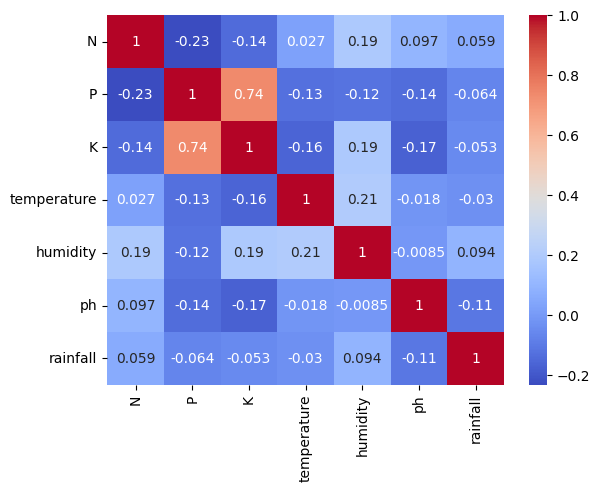

In [27]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Data visualization

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [29]:
# Calculate the counts of each crop label
label_counts = crop['label'].value_counts()
print(label_counts)

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


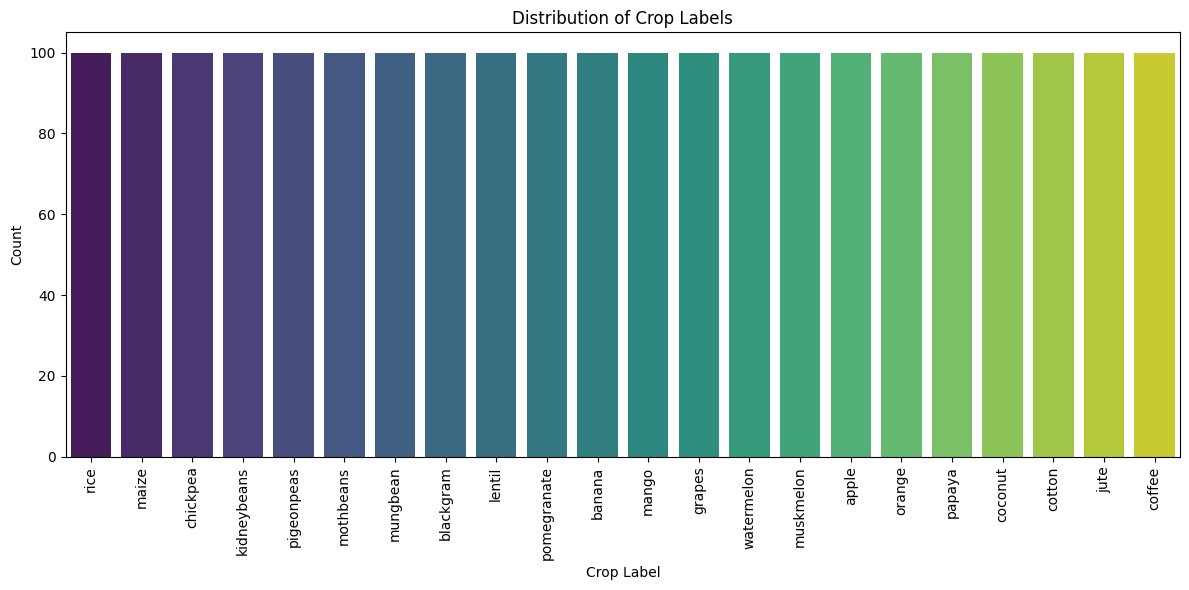

In [30]:
# Bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Distribution of Crop Labels')
plt.tight_layout()
plt.show()

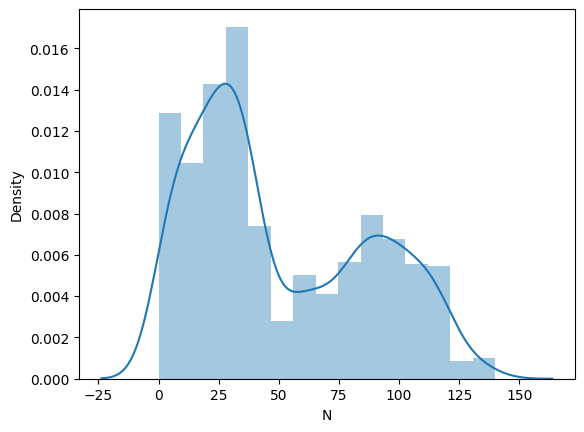

In [31]:
sns.distplot(crop['N'])
plt.show()

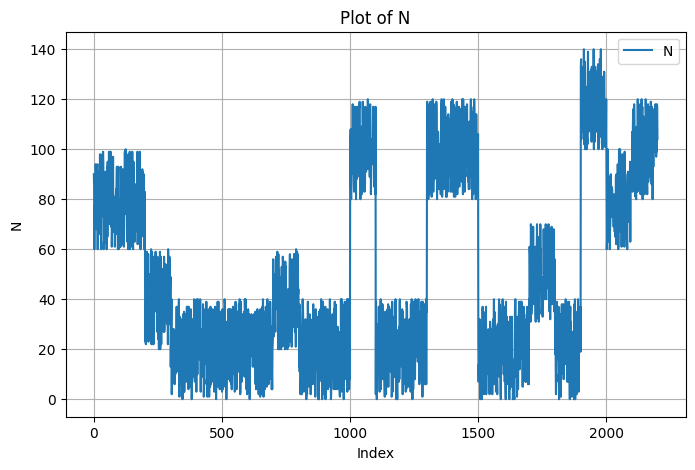

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(crop['N'], label='N')
plt.title("Plot of N")
plt.xlabel("Index")
plt.ylabel("N")
plt.legend()
plt.grid(True)
plt.show()

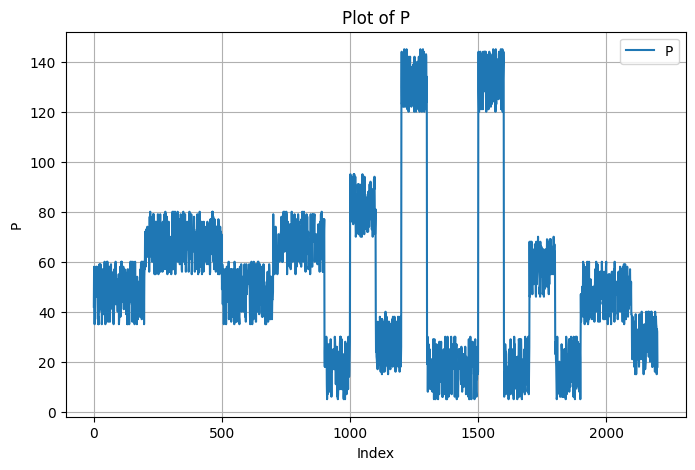

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(crop['P'], label='P')
plt.title("Plot of P")
plt.xlabel("Index")
plt.ylabel("P")
plt.legend()
plt.grid(True)
plt.show()

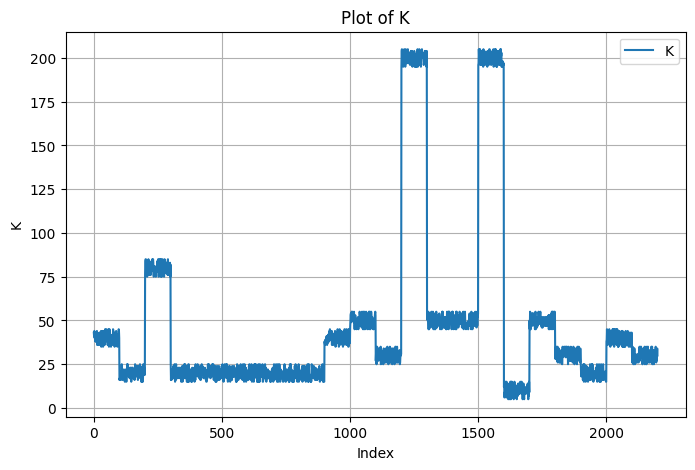

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(crop['K'], label='K')
plt.title("Plot of K")
plt.xlabel("Index")
plt.ylabel("K")
plt.legend()
plt.grid(True)
plt.show()

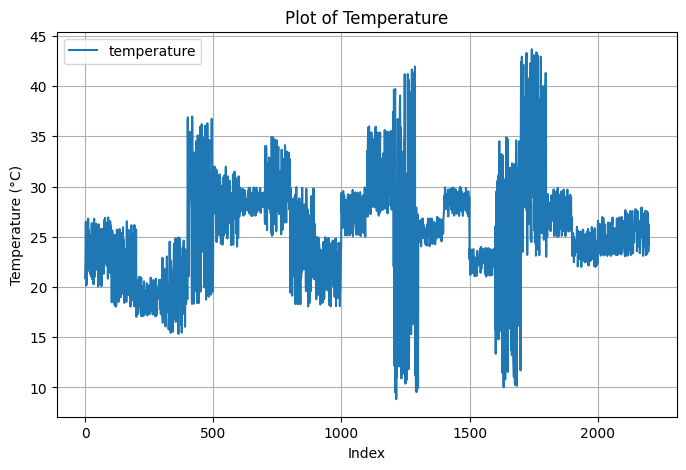

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(crop['temperature'], label='temperature')
plt.title("Plot of Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

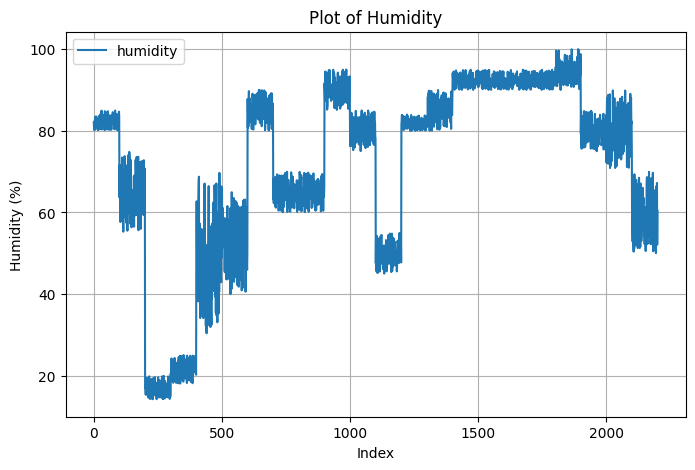

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(crop['humidity'], label='humidity')
plt.title("Plot of Humidity")
plt.xlabel("Index")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
plt.show()

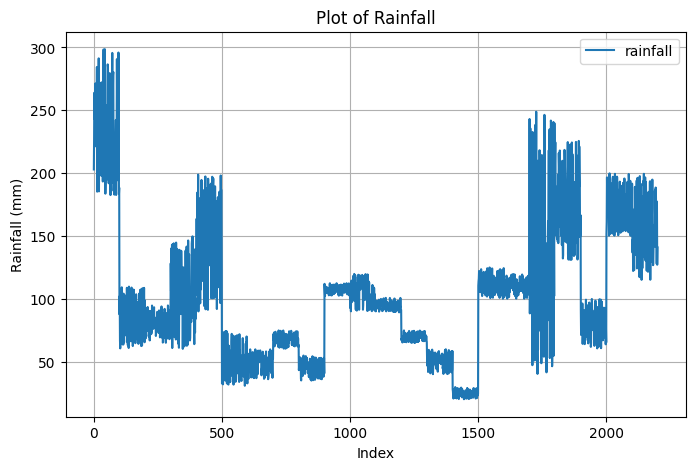

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(crop['rainfall'], label='rainfall')
plt.title("Plot of Rainfall")
plt.xlabel("Index")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()

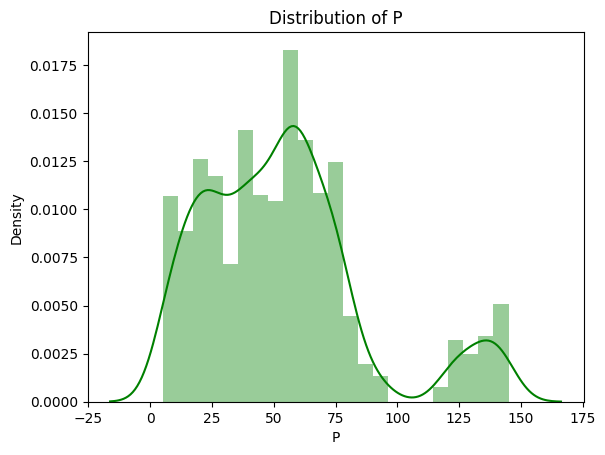

In [38]:
sns.distplot(crop['P'], kde=True, color='green', hist=True)
plt.title("Distribution of P")
plt.xlabel("P")
plt.ylabel("Density")
plt.show()

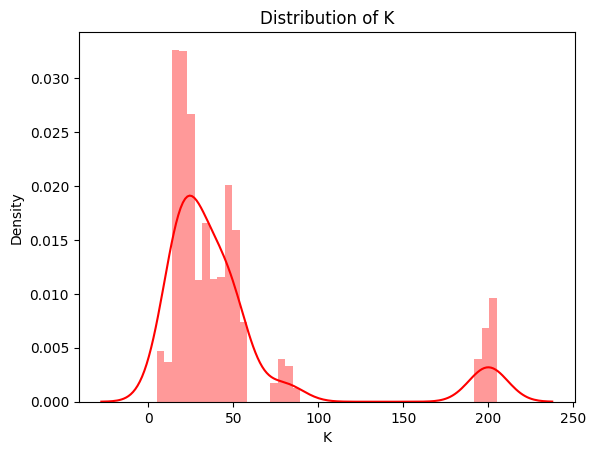

In [39]:
sns.distplot(crop['K'], kde=True, color='red', hist=True)
plt.title("Distribution of K")
plt.xlabel("K")
plt.ylabel("Density")
plt.show()

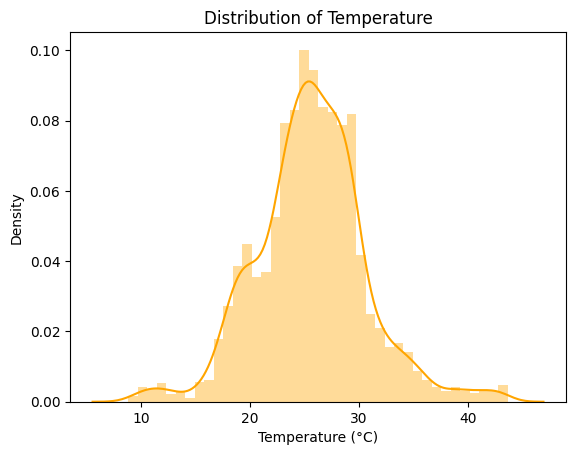

In [40]:
sns.distplot(crop['temperature'], kde=True, color='orange', hist=True)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.show()

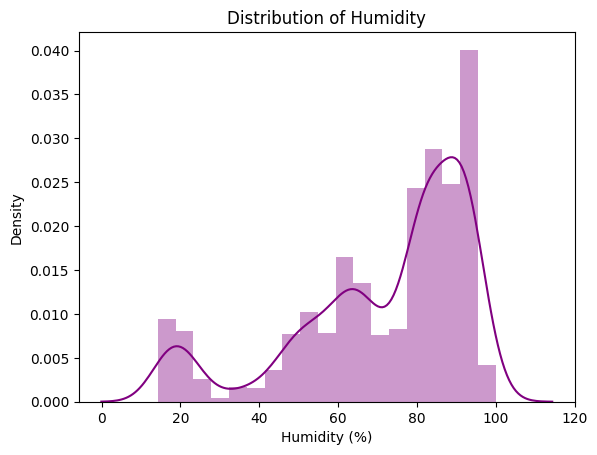

In [41]:
sns.distplot(crop['humidity'], kde=True, color='purple', hist=True)
plt.title("Distribution of Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Density")
plt.show()

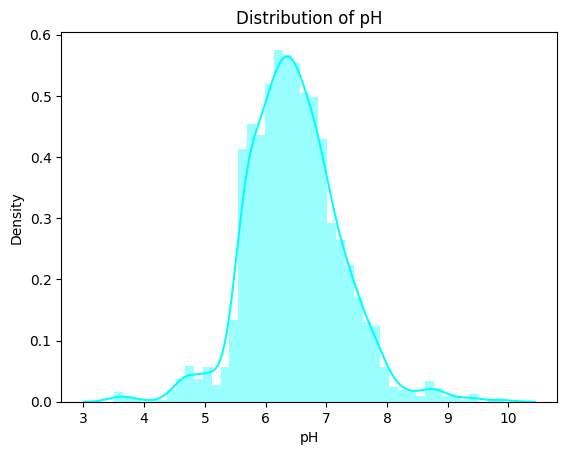

In [42]:
sns.distplot(crop['ph'], kde=True, color='cyan', hist=True)
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.ylabel("Density")
plt.show()

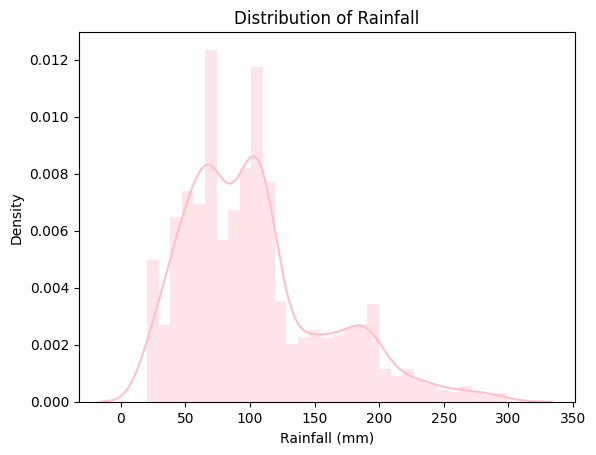

In [43]:
sns.distplot(crop['rainfall'], kde=True, color='pink', hist=True)
plt.title("Distribution of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Density")
plt.show()

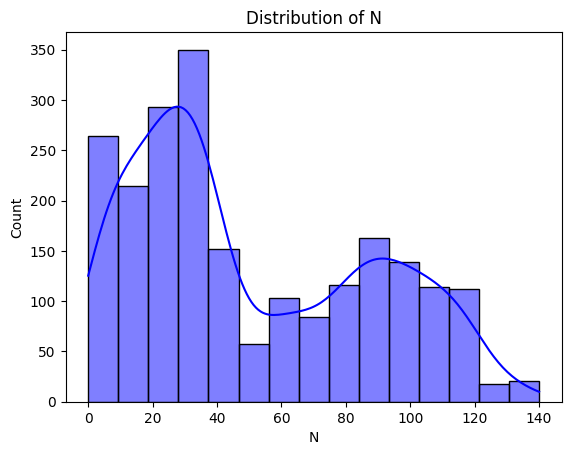

In [44]:
sns.histplot(crop['N'], kde=True, color='blue')
plt.title("Distribution of N")
plt.show()

1. Boxplots for Continuous Variables vs. Label

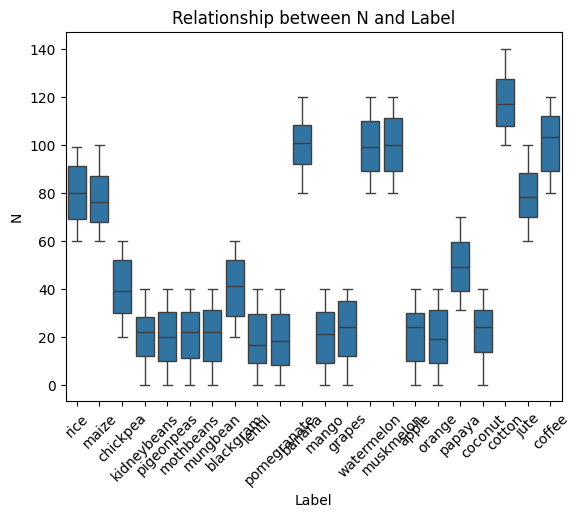

In [45]:
sns.boxplot(x=crop['label'], y=crop['N'])
plt.title("Relationship between N and Label")
plt.xlabel("Label")
plt.ylabel("N")
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

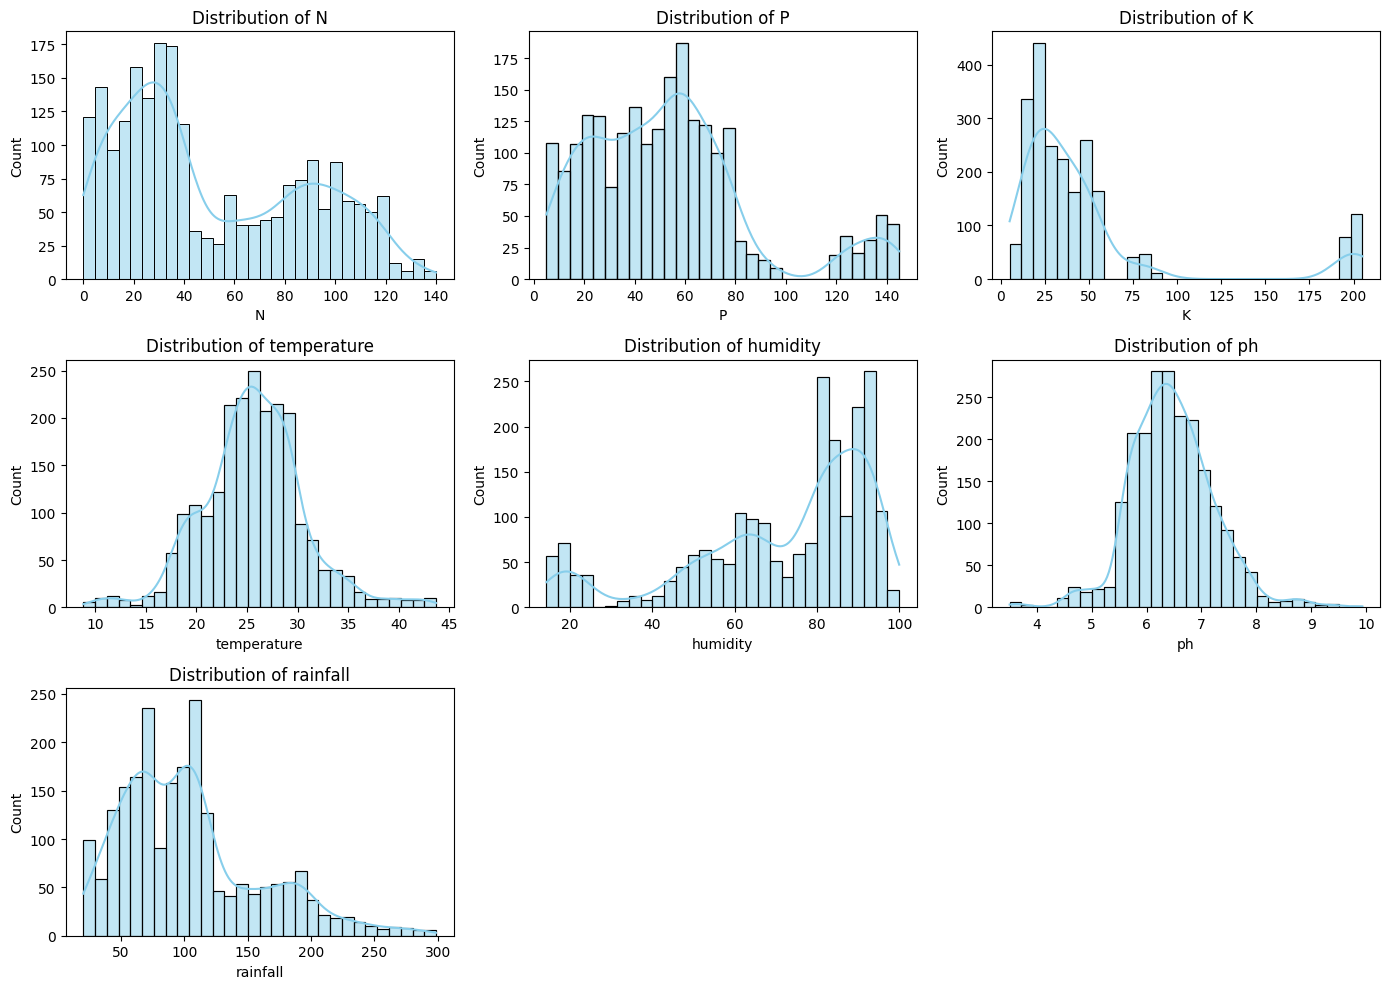

In [46]:
# Select numerical columns (excluding the label)
num_cols = crop.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('label') if 'label' in num_cols else None

# Plot histograms for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on number of columns
    sns.histplot(crop[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

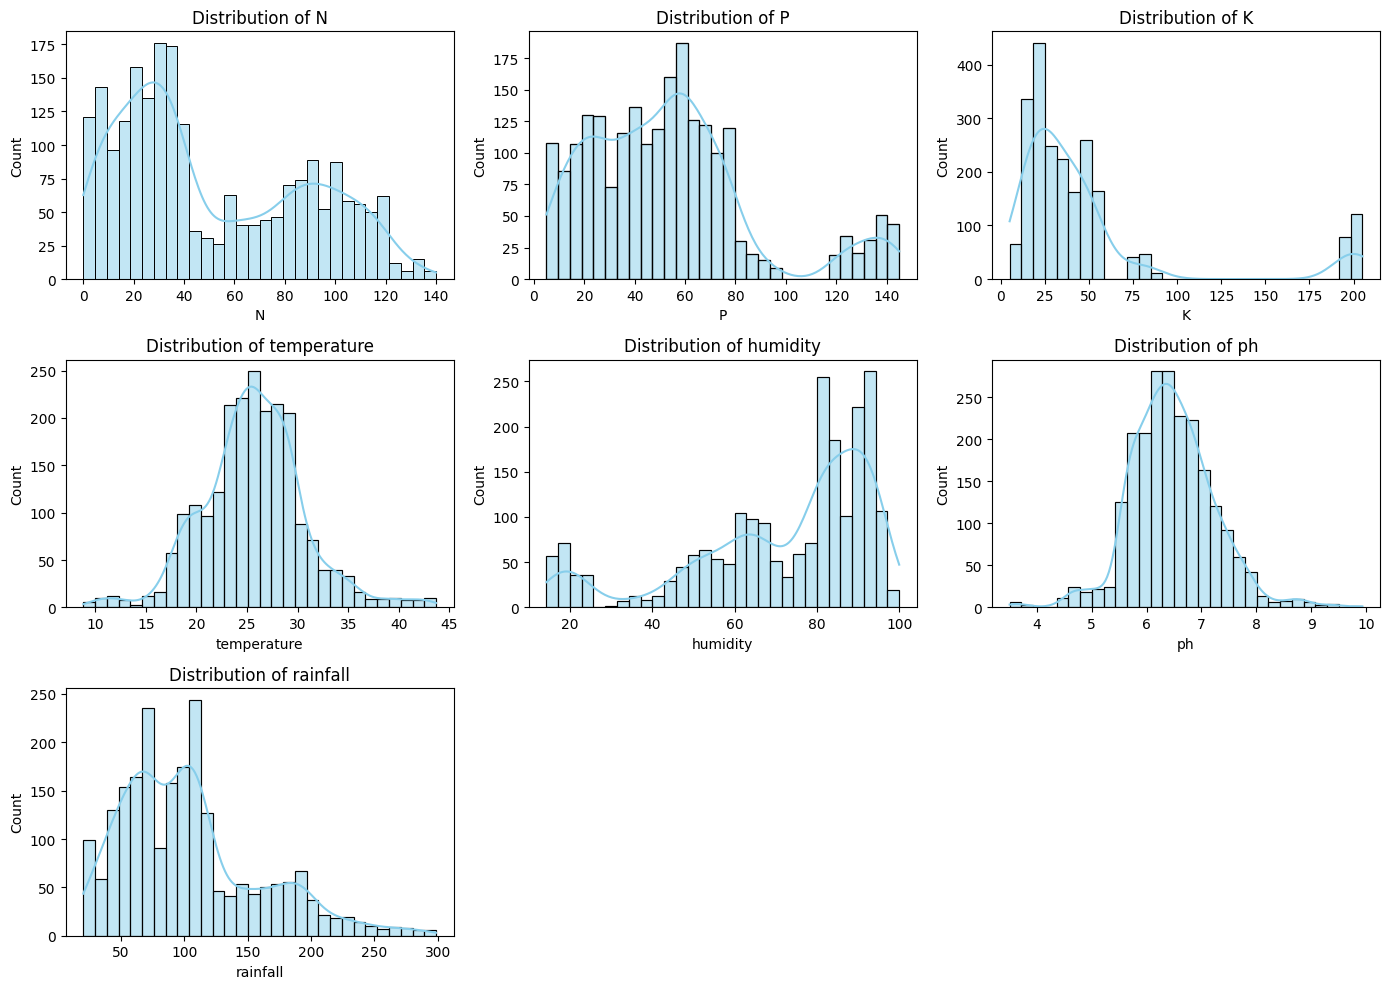

In [47]:
# Scatter Plots to Examine Relationships Between Variables
# Select numerical columns (excluding the label)
num_cols = crop.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('label') if 'label' in num_cols else None

# Plot histograms for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on number of columns
    sns.histplot(crop[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

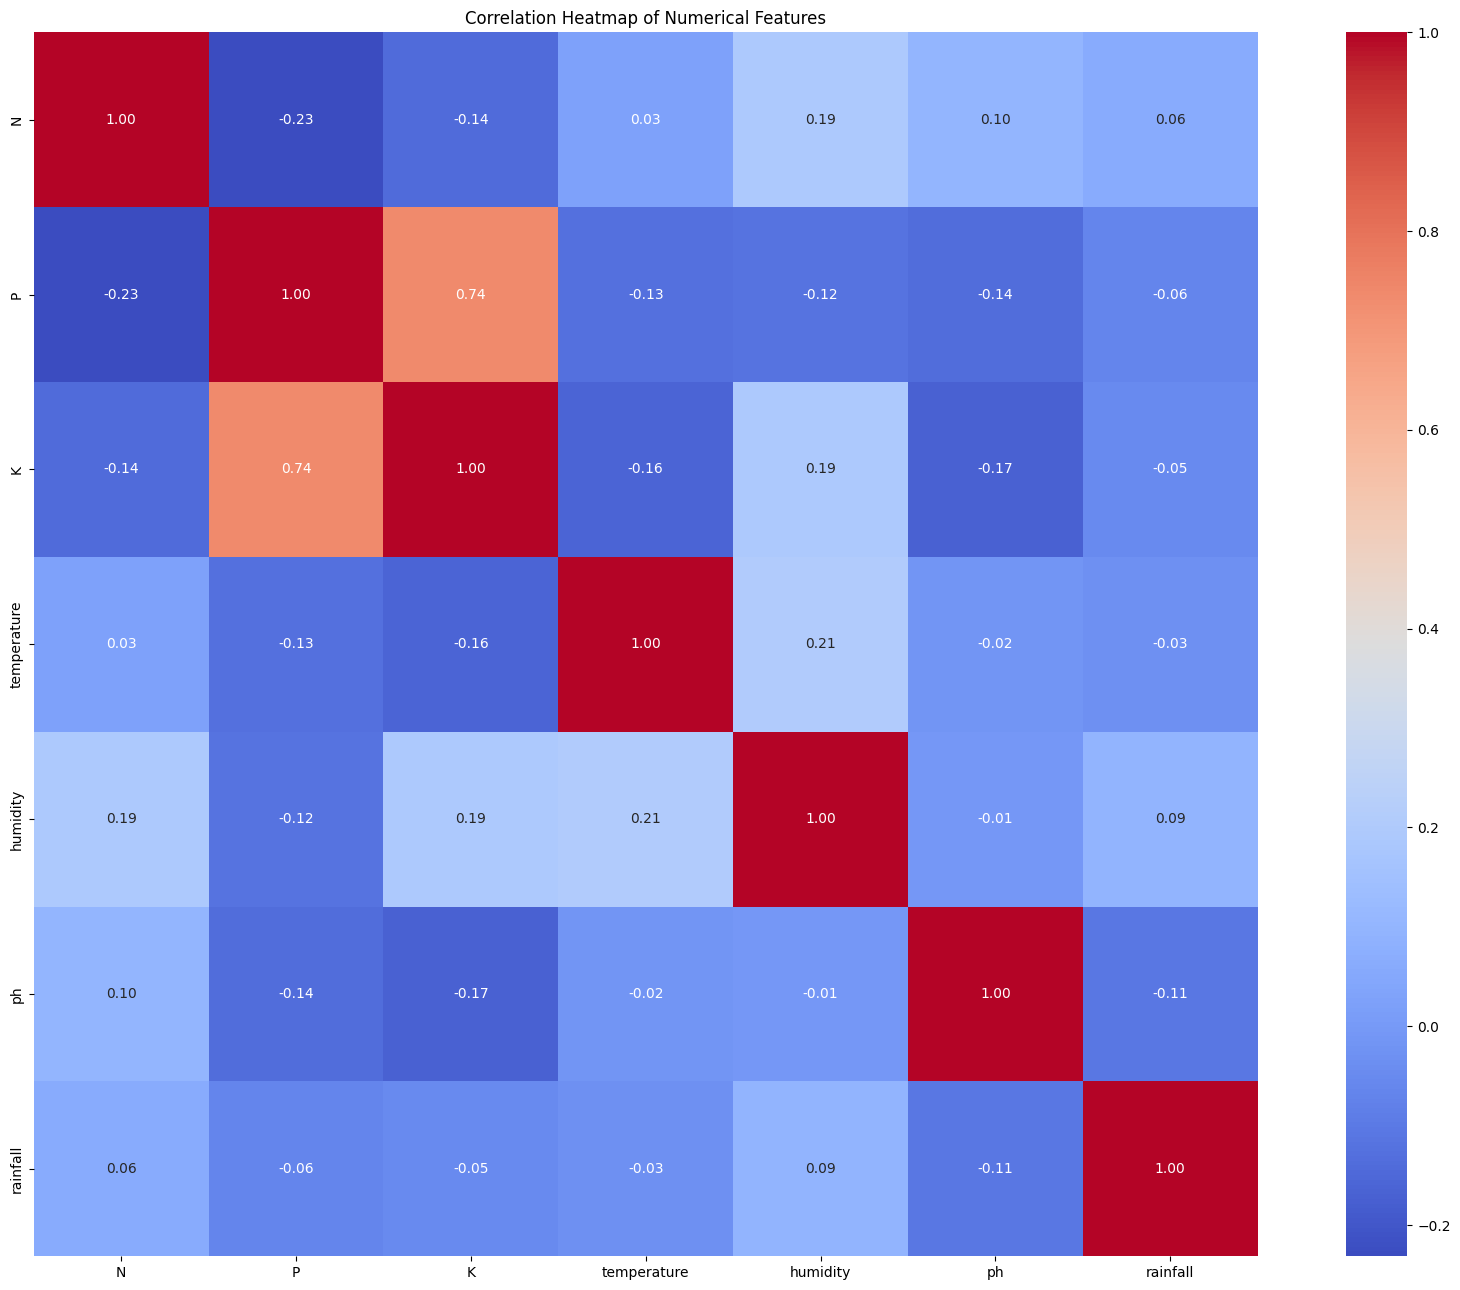

In [48]:
# Compute the correlation matrix for numerical features
corr_matrix = crop[num_cols].corr()

plt.figure(figsize=(18, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

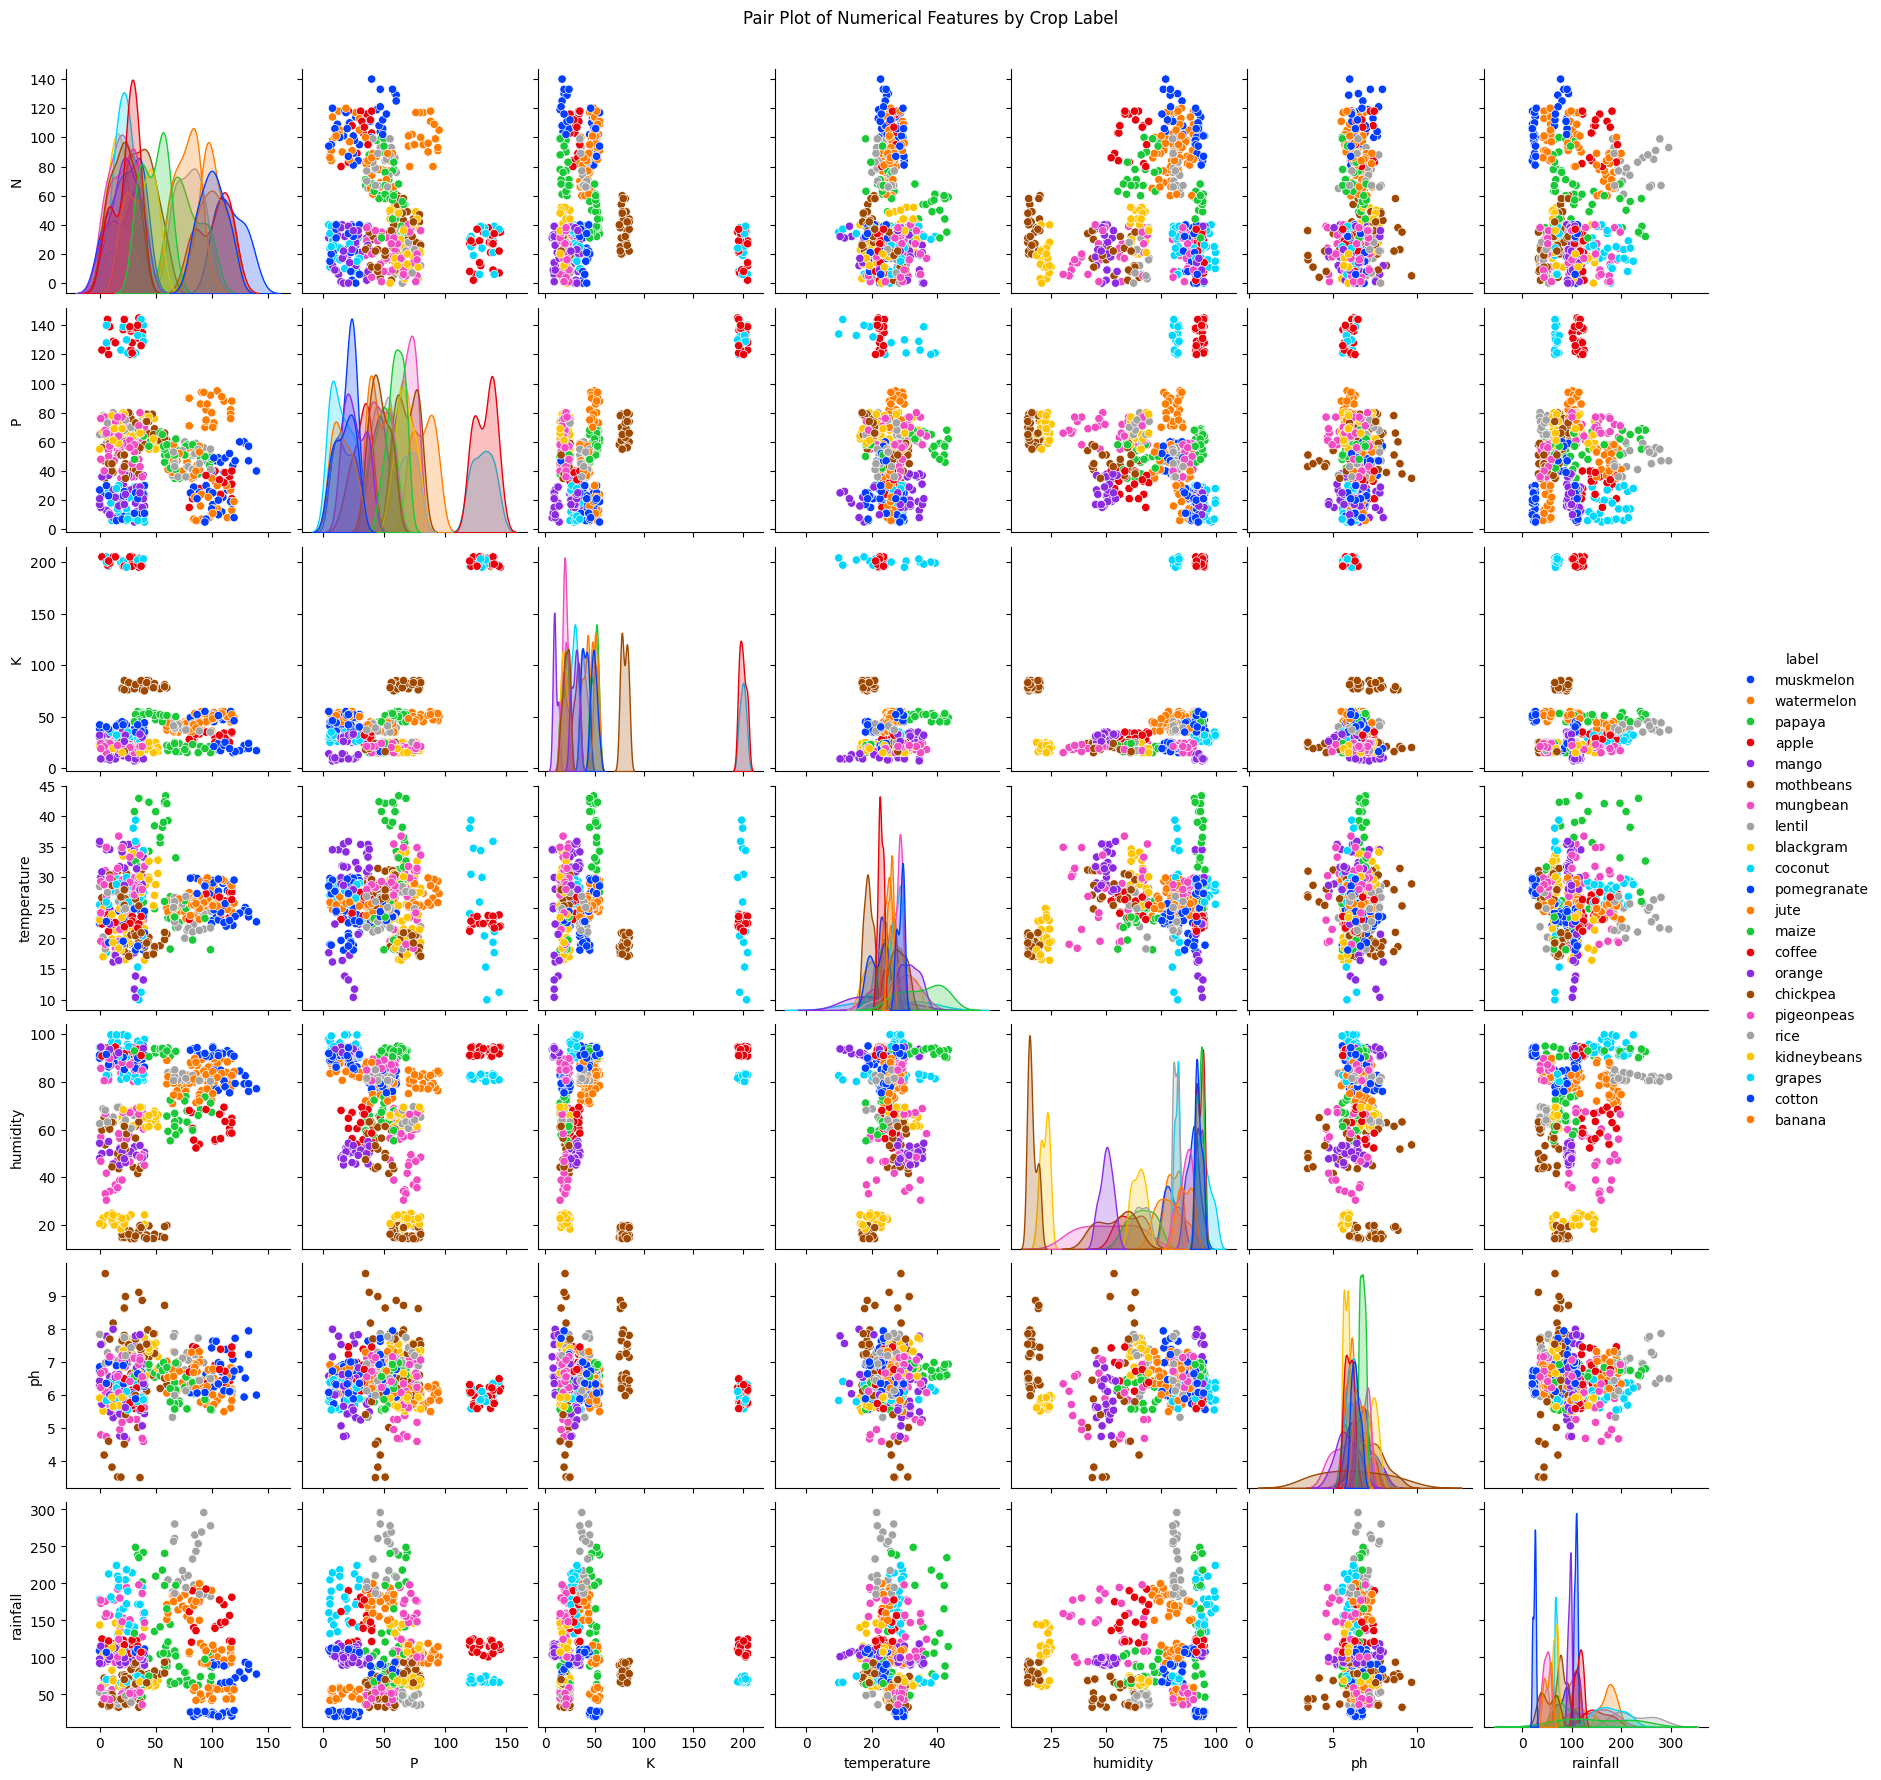

In [49]:
# If dataset is large, take a random sample for better visualization
sample_crop = crop.sample(n=500, random_state=42) if crop.shape[0] > 500 else crop

sns.pairplot(sample_crop[num_cols + ['label']], hue='label', palette='bright', diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of Numerical Features by Crop Label', y=1.02)
plt.show()

#### 2. Violin Plots for More Detailed Distribution

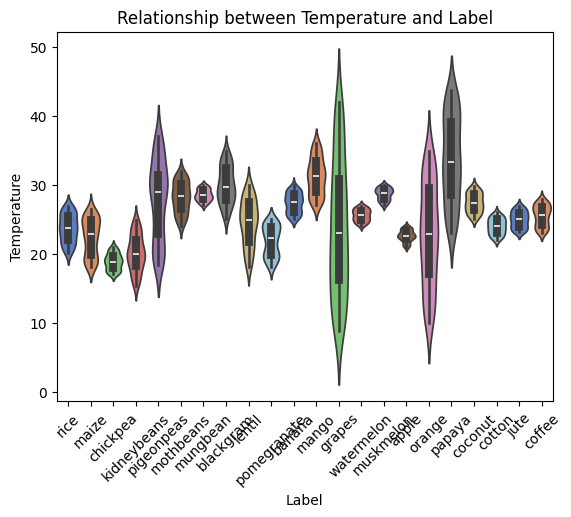

In [50]:
sns.violinplot(x=crop['label'], y=crop['temperature'], palette="muted")
plt.title("Relationship between Temperature and Label")
plt.xlabel("Label")
plt.ylabel("Temperature")
plt.xticks(rotation=45)
plt.show()

#### 3. Point Plot to Observe Trends

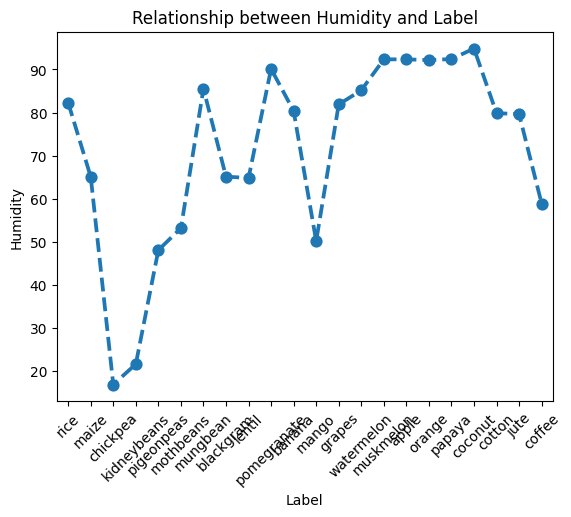

In [51]:
sns.pointplot(x=crop['label'], y=crop['humidity'], ci=None, markers="o", linestyles="--")
plt.title("Relationship between Humidity and Label")
plt.xlabel("Label")
plt.ylabel("Humidity")
plt.xticks(rotation=45)
plt.show()

#### 4. Pairplots for Overall Relationships

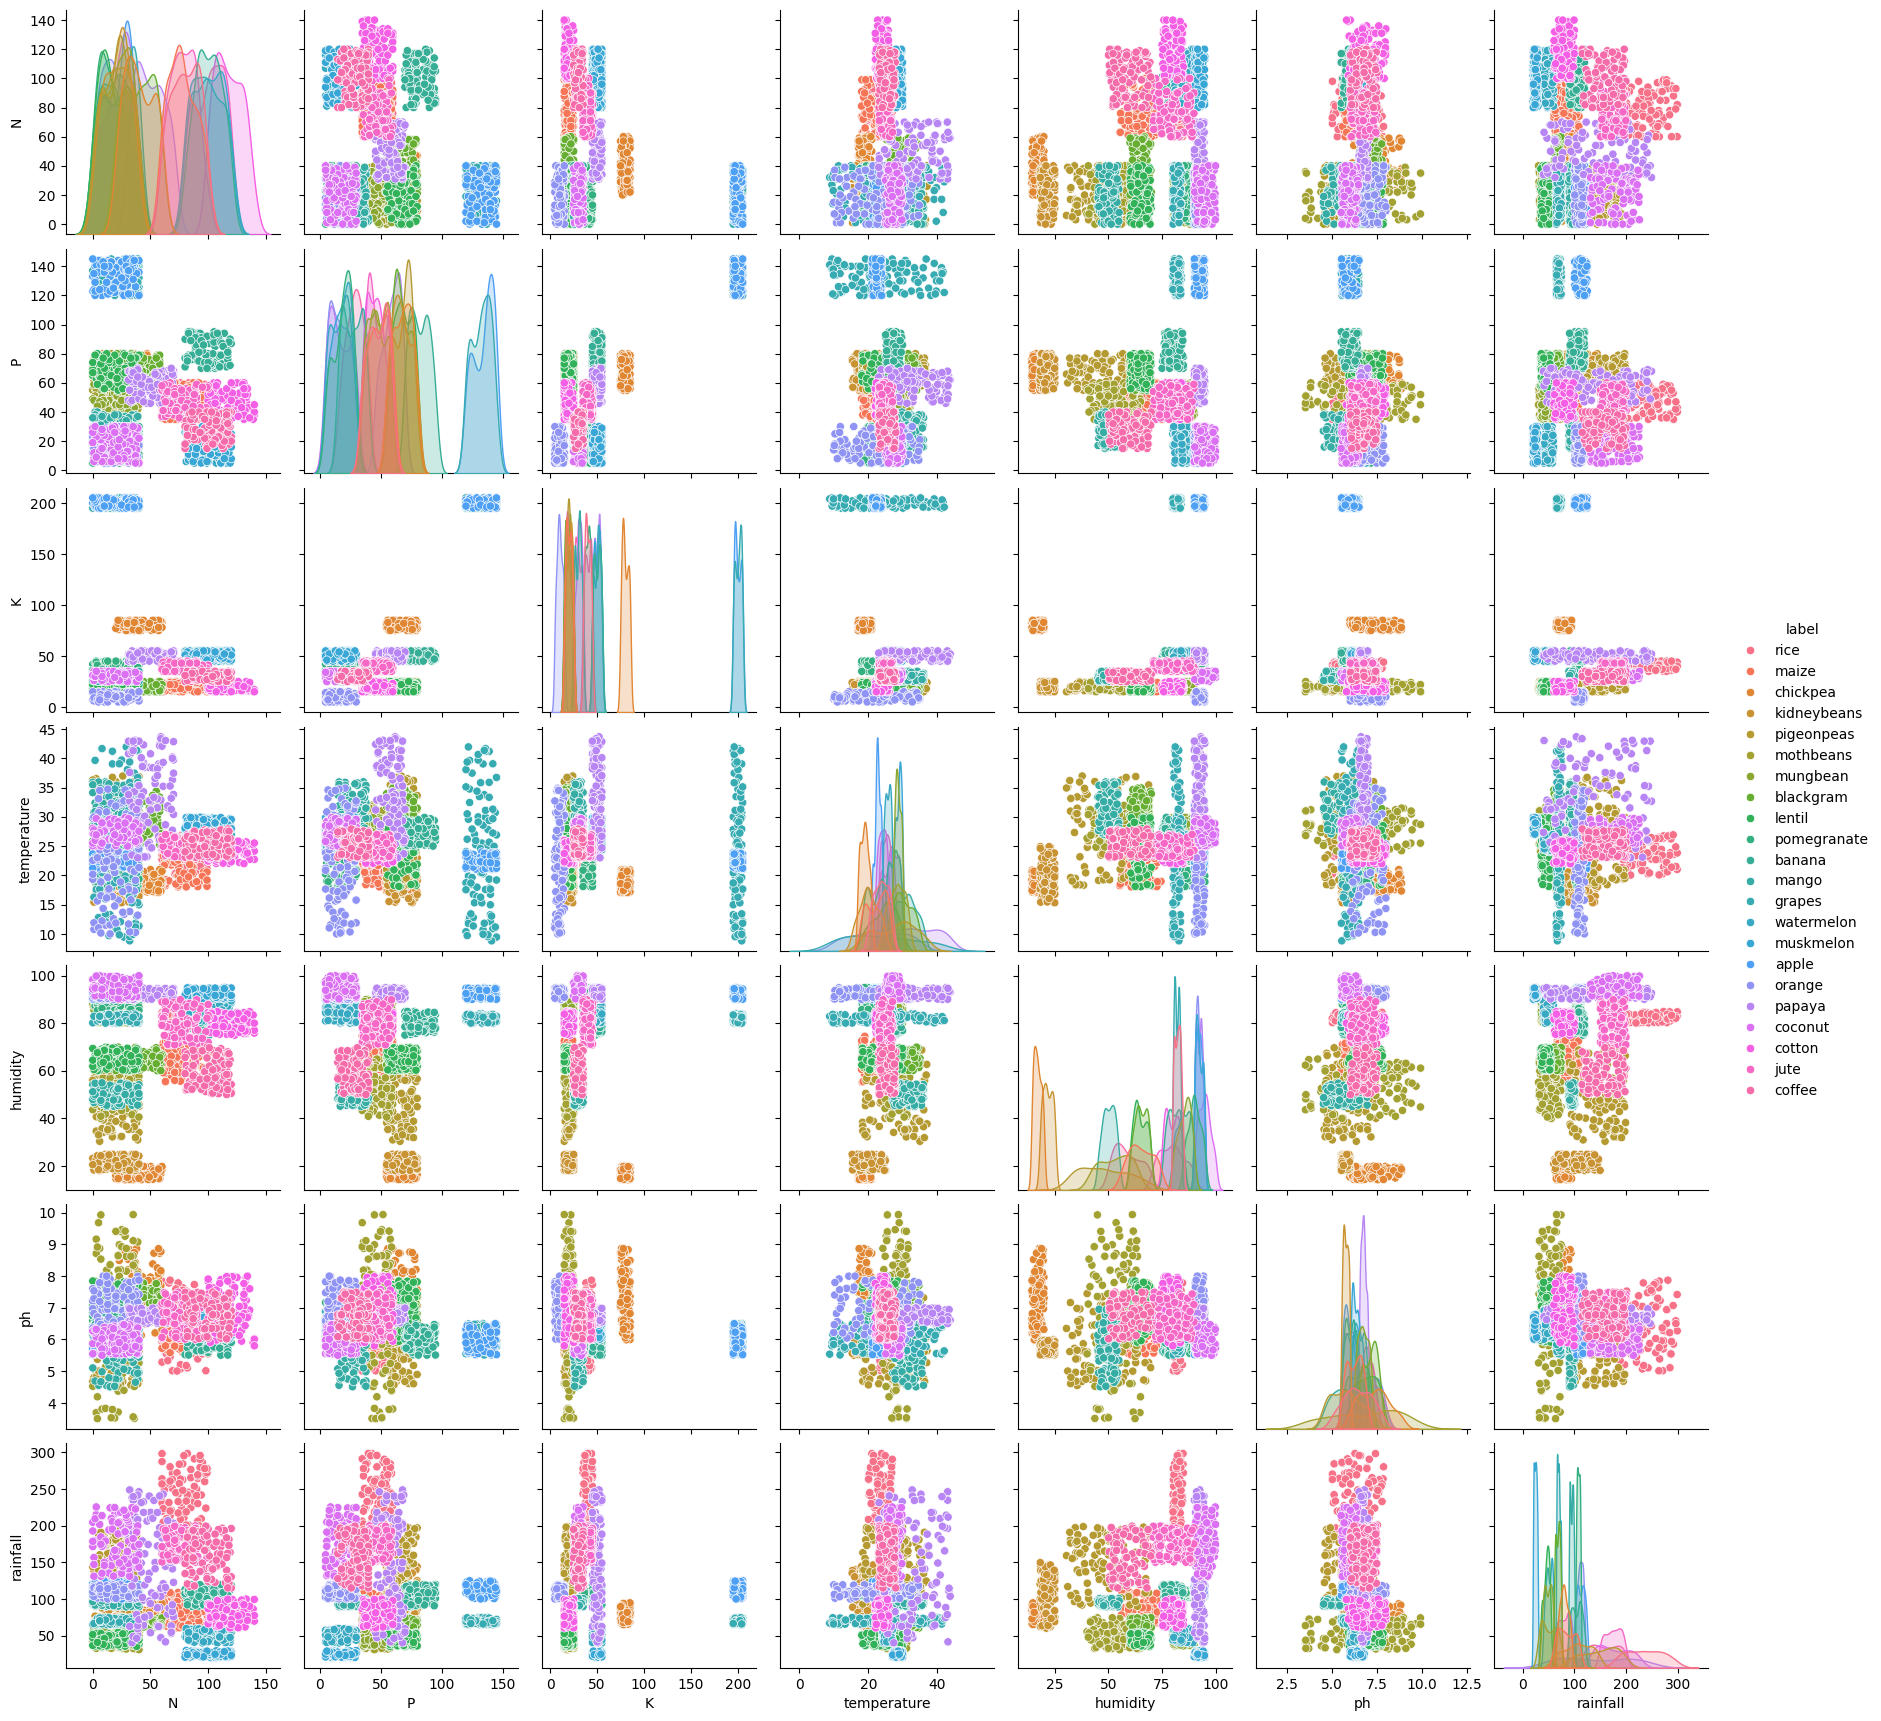

In [52]:
sns.pairplot(crop, hue='label', diag_kind='kde')
plt.show()

#### 5. Scatter Plots for Relationships

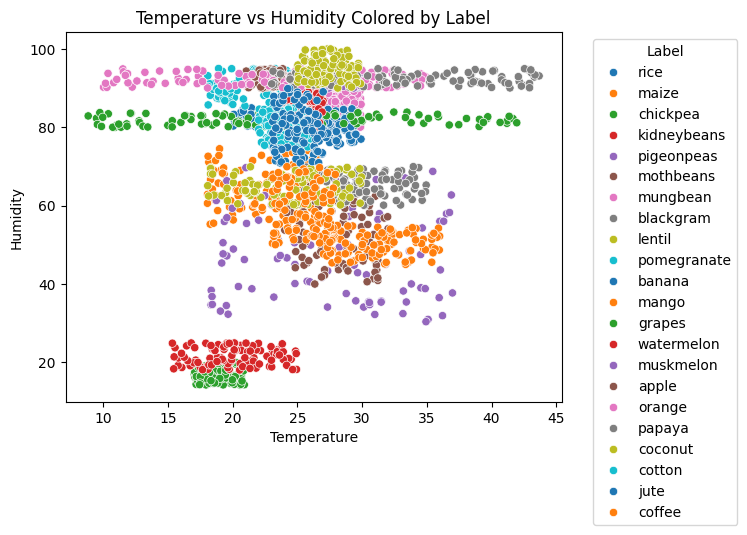

In [53]:
sns.scatterplot(data=crop, x='temperature', y='humidity', hue='label', palette='tab10')
plt.title("Temperature vs Humidity Colored by Label")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend
plt.show()

## Encoding

In [54]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [55]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22,
    'sugarcane': 23,
    'jowar': 24,
    'wheat': 25,
    'groundnut': 26,
    'tur': 27,
    'urad': 28,
    'moong': 29,
    'gram': 30,
    'masoor': 31,
    'soybean': 32,
    'ginger': 33,
    'turmeric': 34
}
# Convert the 'label' column to lowercase and map using the crop_dict
crop['crop_num'] = crop['label'].str.lower().map(crop_dict)

In [56]:
crop.head()

N   P   K  temperature   humidity        ph    rainfall label  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice         1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice         1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice         1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice         1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice         1

In [57]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

N   P   K  temperature   humidity        ph    rainfall  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536         1
1  85  58  41    21.770462  80.319644  7.038096  226.655537         1
2  60  55  44    23.004459  82.320763  7.840207  263.964248         1
3  74  35  40    26.491096  80.158363  6.980401  242.864034         1
4  78  42  42    20.130175  81.604873  7.628473  262.717340         1

###  Train Test Split

In [58]:
X = crop.drop('crop_num',axis=1)
y = crop['crop_num']

In [59]:
X.shape

(2200, 7)

In [60]:
y.shape

(2200,)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(1760, 7)

In [64]:
X_test.shape

(440, 7)

## Scale The Features Using MinMaxScaler

In [65]:
X_train

N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]

In [66]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
ms.fit(X_train)

X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [67]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

### Standarization

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

### Training Models

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [71]:
# Storing model instances in a dictionary
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}
for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name} with accuraccy : {accuracy_score(y_test,ypred)}")

LogisticRegression with accuraccy : 0.9636363636363636
GaussianNB with accuraccy : 0.9954545454545455
SVC with accuraccy : 0.9681818181818181
KNeighborsClassifier with accuraccy : 0.9659090909090909
DecisionTreeClassifier with accuraccy : 0.9863636363636363
ExtraTreesClassifier with accuraccy : 0.9886363636363636
RandomForestClassifier with accuraccy : 0.9931818181818182
BaggingClassifier with accuraccy : 0.990909090909091
GradientBoostingClassifier with accuraccy : 0.9818181818181818
AdaBoostClassifier with accuraccy : 0.14545454545454545


## RANDOM FOREST

In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)

accuracy_score(y_test,ypred)

0.9931818181818182

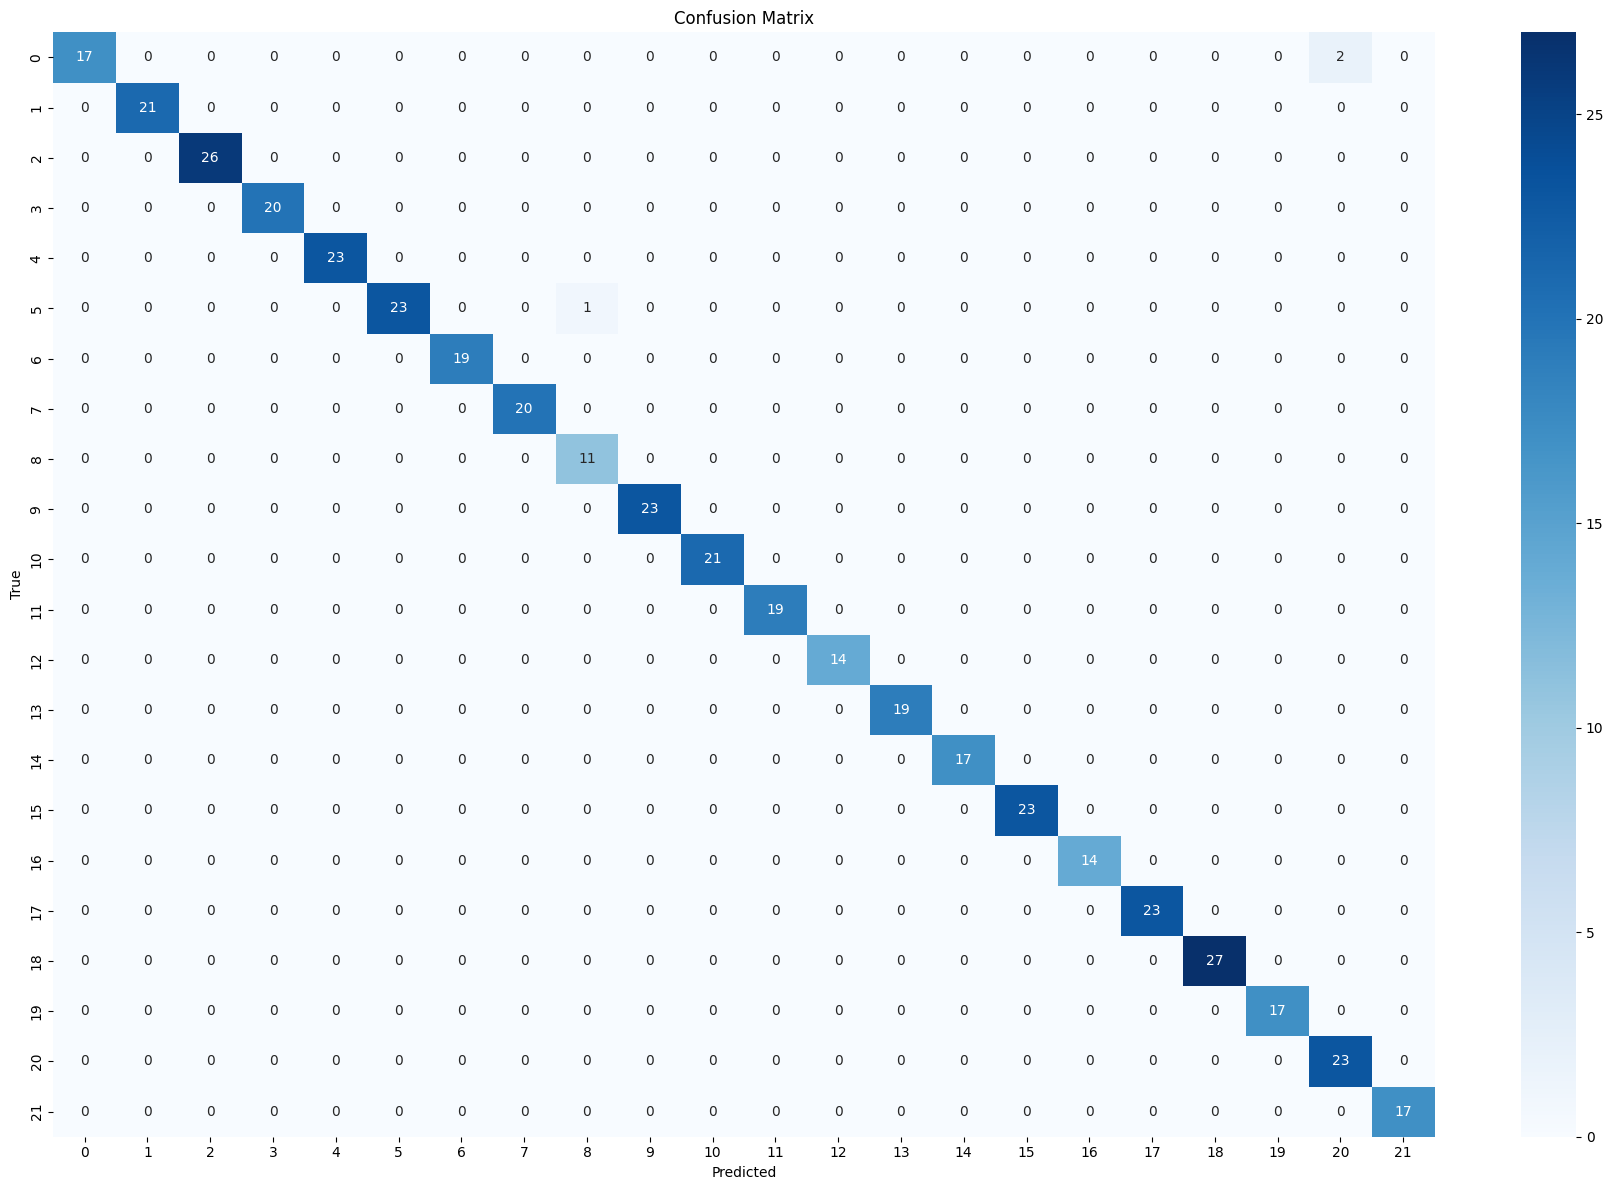

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize=(18, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [75]:
# Binarize the test labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

In [76]:
# Get predicted probabilities for each class
y_score = rfc.predict_proba(X_test)

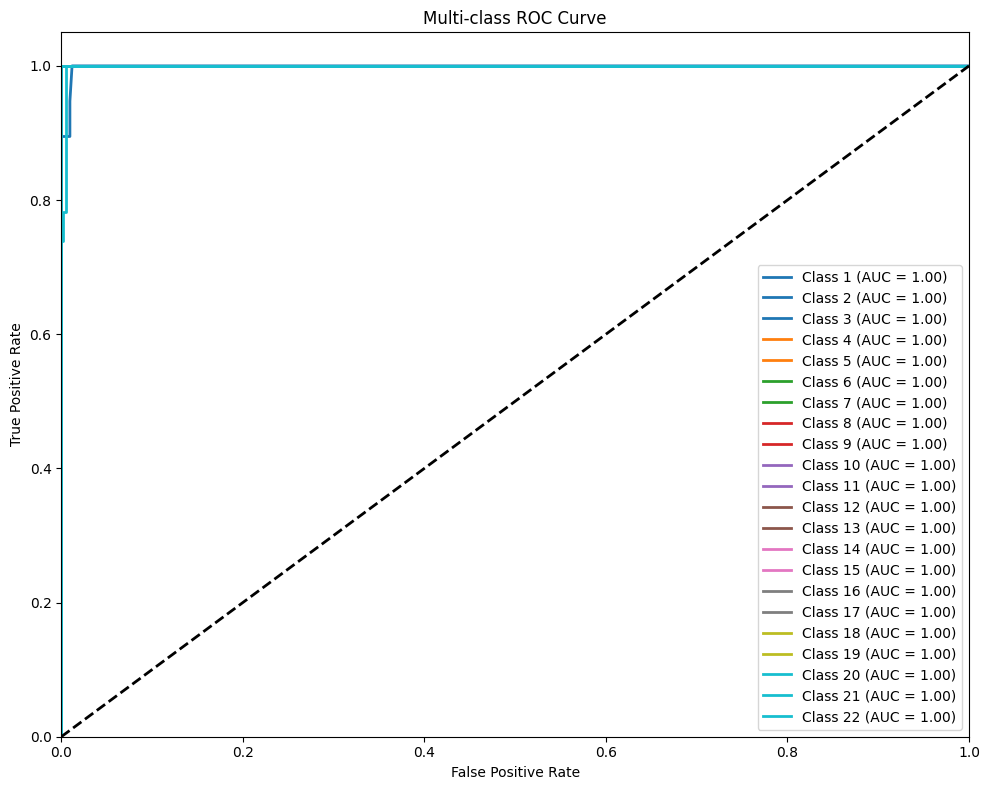

In [77]:
# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             lw=2, label='Class {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### impoving the accuracy

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [79]:
# 1. Hyperparameter Tuning with GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [80]:
grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_
print("Best Hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


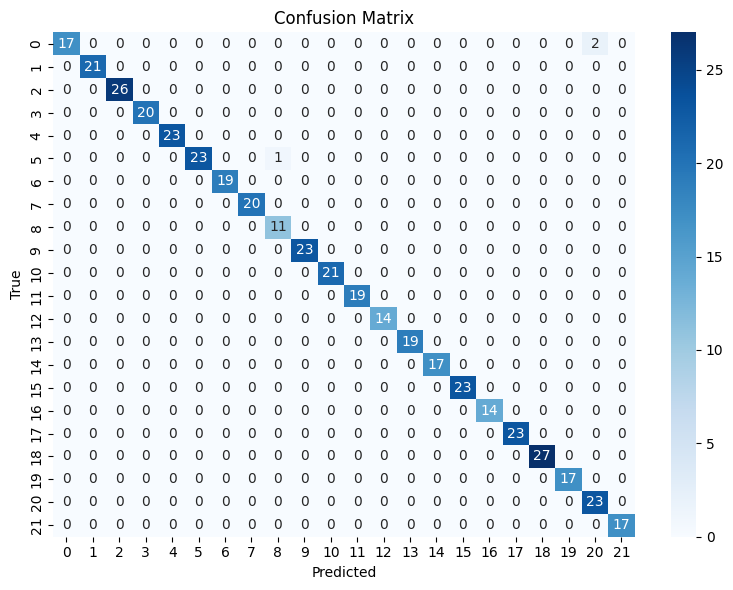

In [82]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, ypred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## 3. Multi-class ROC & AUC

In [83]:
# Get unique classes from y_test and binarize y_test for ROC computation
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

In [84]:
# Get predicted probabilities for each class
y_score = best_rfc.predict_proba(X_test)

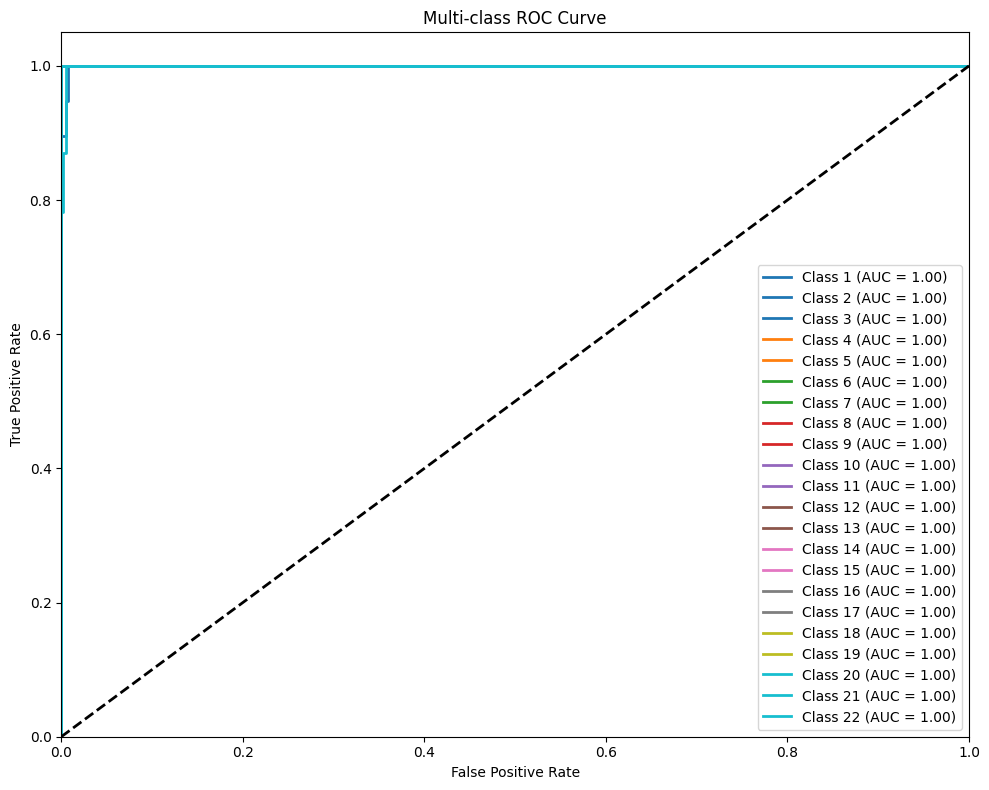

In [85]:
# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             color=colors(i),
             lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [86]:
def recommendation(N,P,K,temprature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temprature,humidity,ph,rainfall]])
    prediction  = rfc.predict(features).reshape(1,-1)

    return prediction[0]

# Provided dictionary mapping crop names to numeric codes
crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22,
    'sugarcane': 23,
    'jowar': 24,
    'wheat': 25,
    'groundnut': 26,
    'tur': 27,
    'urad': 28,
    'moong': 29,
    'gram': 30,
    'masoor': 31,
    'soybean': 32,
    'ginger': 33,
    'turmeric': 34
}

# Create an inverse dictionary to map numeric codes back to crop names
crop_dict_inv = {v: k for k, v in crop_dict.items()}

# Define the input parameters for testing
N = 20
P = 30 
K = 40 
temperature = 40.0
humidity = 20
ph = 7
rainfall = 50

# Get the predicted crop label using your recommendation function or model.
# The recommendation function should return a list or array with the predicted numeric label.
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

# Check if the prediction is in our inverse mapping and print the result
if predict[0] in crop_dict_inv:
    crop = crop_dict_inv[predict[0]]
    print("{} is the best crop to cultivate.".format(crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")


In [87]:
N = 20
P = 30 
K = 40 
temperature = 40.0
humidity = 20
ph = 7
rainfall = 50

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

crop_dict = {
    1: "rice", 2: "maize", 3: "jute", 4: "cotton", 5: "coconut", 6: "papaya", 7: "orange", 8: "apple",
    9: "muskmelon", 10: "watermelon", 11: "grapes", 12: "mango", 13: "banana", 14: "pomegranate",
    15: "lentil", 16: "blackgram", 17: "mungbean", 18: "mothbeans", 19: "pigeonpeas", 20:"kidneybeans",
    21: "chickpea", 22: "coffee"
}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to cultivated ".format(crop))

else:
    print("Sorry we are not able to recommend a proper cropfor this environment")

blackgram is the best crop to cultivated 


In [88]:
import pickle 
pickle.dump(rfc,open('../ml_models/saved_model/crop_model.pkl','wb'))
pickle.dump(ms,open('../ml_models/saved_model/minmaxscaler.pkl','wb'))
pickle.dump(sc,open('../ml_models/saved_model/standscaler.pkl','wb'))

In [ ]:
import joblib
joblib.dump(rfc, '../ml_models/saved_model/crop_model.pk')

In [ ]:
ypred_best = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, ypred_best)
print("\nTest Accuracy: {:.4f}".format(accuracy))
print("\nClassification Report:")
print(classification_report(y_test, ypred_best))